In [23]:
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
base_dir = "lumpy_skin_dataset"

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [26]:
train_generator = train_datagen.flow_from_directory(directory = base_dir,
target_size = (150,150),
batch_size = 35,
class_mode = "binary",
subset = "training",
shuffle = True)

Found 820 images belonging to 2 classes.


In [27]:
validation_generator = train_datagen.flow_from_directory(directory = base_dir,
target_size = (150,150),
batch_size = 35,
class_mode = "binary",
subset = "validation",
shuffle = True)

Found 204 images belonging to 2 classes.


## CNN

In [28]:
model = Sequential([
    # First convolutional block
    Conv2D(8, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps to feed into Dense layers
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # Output layer: 1 node with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

C:\Users\0945\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(loss = "binary_crossentropy", 
              optimizer = "adam",
              metrics = ["accuracy"])

In [30]:
epochs = 15
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

C:\Users\0945\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.6721 - loss: 0.6047 - val_accuracy: 0.7059 - val_loss: 0.5340
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.7423 - loss: 0.5077 - val_accuracy: 0.7794 - val_loss: 0.4999
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.7702 - loss: 0.5008 - val_accuracy: 0.8186 - val_loss: 0.4688
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.8111 - loss: 0.4184 - val_accuracy: 0.7941 - val_loss: 0.4373
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.8042 - loss: 0.4184 - val_accuracy: 0.8039 - val_loss: 0.4530
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.8372 - loss: 0.3553 - val_accuracy: 0.7941 - val_loss: 0.4503
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.8522 - loss: 0.3417 - val_accuracy: 0.8382 - val_loss: 0.4347
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.8633 - loss: 0.3243 - val_accuracy: 0.

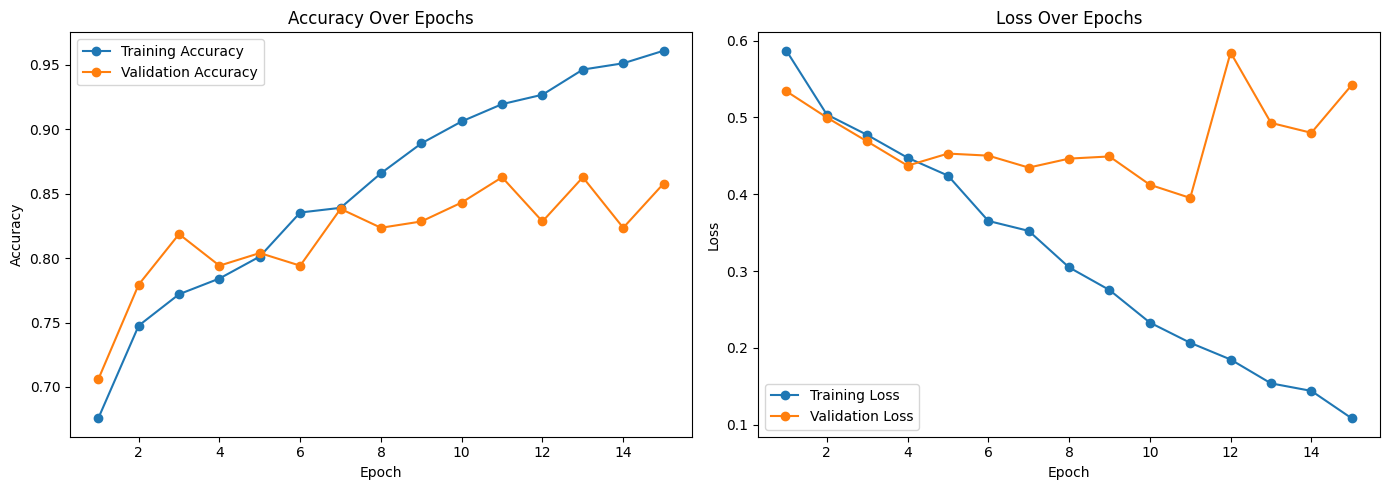

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8646 - loss: 0.5105
Validation Loss: 0.5422
Validation Accuracy: 0.8578


In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(14, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

## MobileNet

In [32]:
from tensorflow.keras.applications import MobileNet

In [33]:
base_model = MobileNet(
    input_shape=(150, 150, 3),
    alpha=1.0,            # width multiplier (1.0 is the default)
    depth_multiplier=1,   # depth multiplier for depthwise convolution
    dropout=0.001,        # dropout rate at the last layer of MobileNet
    include_top=False,    # remove MobileNet's top classification head
    weights='imagenet'    # start with pretrained ImageNet weights
)


C:\Users\0945\AppData\Local\Temp\ipykernel_8480\1534286966.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(


In [34]:
for layer in base_model.layers:
    layer.trainable = False

In [35]:
mobinet_model = Sequential([
    base_model,                # Use MobileNet as the base
    GlobalAveragePooling2D(),  # or Flatten(), but GlobalAveragePooling2D is common with MobileNet
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [36]:
mobinet_model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [37]:
mobinet_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,360,193 (12.82 MB)

 Trainable params: 131,329 (513.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [38]:
early_stopping = EarlyStopping(
    monitor='val_loss',   # You can also monitor 'val_accuracy'
    patience=3,           # Number of epochs to wait after no improvement
    restore_best_weights=True  # Restore model weights from the epoch with the best value
)

In [39]:
history1 = mobinet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks = [early_stopping]
)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 493ms/step - accuracy: 0.6746 - loss: 0.7803 - val_accuracy: 0.8480 - val_loss: 0.3560
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 422ms/step - accuracy: 0.8417 - loss: 0.4210 - val_accuracy: 0.8873 - val_loss: 0.2637
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 443ms/step - accuracy: 0.8998 - loss: 0.2549 - val_accuracy: 0.9020 - val_loss: 0.2312
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 433ms/step - accuracy: 0.8979 - loss: 0.2331 - val_accuracy: 0.8971 - val_loss: 0.2616
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 425ms/step - accuracy: 0.8935 - loss: 0.2386 - val_accuracy: 0.9314 - val_loss: 0.2078
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 464ms/step - accuracy: 0.9356 - loss: 0.1707 - val_accuracy: 0.9314 - val_loss: 0.2045
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 498ms/step - accuracy: 0.9508 - loss: 0.1502 - val_accuracy: 0.9167 - val_loss: 0.2346
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 435ms/step - accuracy: 0.9600 - loss: 0.1214 - val_accu

In [40]:
model.save('my_mobilenet_model.h5')  # Save entire model
print("Model saved as 'my_mobilenet_model.h5'")

Model saved as 'my_mobilenet_model.h5'


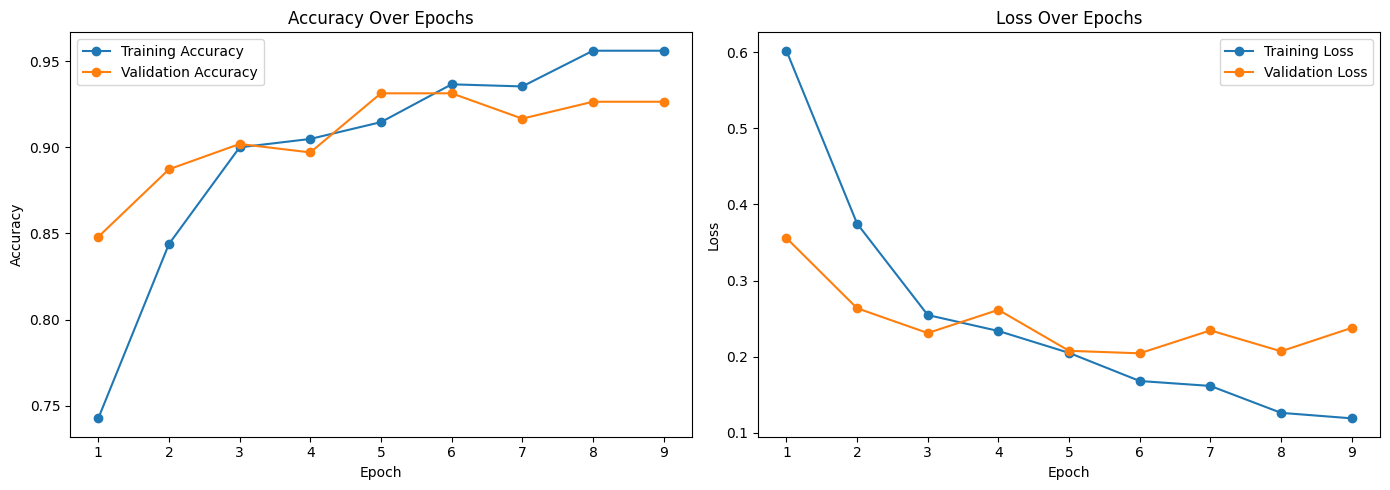

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.8775 - loss: 0.4877
Validation Loss: 0.5422
Validation Accuracy: 0.8578


In [41]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")